# ASSIGNMENT - 3  (ANWAR SIRAJ)
(DEEP LEARNING-PGD-DSAI-BATCH-5)

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

In [ ]:
pip install pandas numpy scikit-learn tensorflow matplotlib

In [ ]:
# Install Kaggle API if necessary (not required in Kaggle Kernels)
!pip install kaggle

# Use Kaggle API to download the dataset
!kaggle datasets download -d mohansacharya/graduate-admissions

# Unzip the dataset
import zipfile
with zipfile.ZipFile('graduate-admissions.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

# Display the first few rows of the dataset
print(df.head())


Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 11.0MB/s]
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df = df.drop(columns=['Serial No.'], errors='ignore')

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Admission_Predict.csv')

# Drop the column 'Serial No.' if it exists
df = df.drop(columns=['Serial No.'], errors='ignore')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Admission_Predict.csv")

# Adjust according to the exact column name
X = df.drop(["Chance of Admit ", "Serial No."], axis=1)
y = df["Chance of Admit "]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.004617003377285005, 0.8212082591486993)

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Creating a Sequential Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Configuring the Model for Training
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Training the Model with Validation
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=2)

Epoch 1/200
8/8 - 0s - 22ms/step - loss: 0.0105 - mae: 0.0803 - val_loss: 0.0078 - val_mae: 0.0574
Epoch 2/200
8/8 - 0s - 47ms/step - loss: 0.0075 - mae: 0.0671 - val_loss: 0.0080 - val_mae: 0.0617
Epoch 3/200
8/8 - 0s - 56ms/step - loss: 0.0087 - mae: 0.0732 - val_loss: 0.0105 - val_mae: 0.0821
Epoch 4/200
8/8 - 0s - 18ms/step - loss: 0.0096 - mae: 0.0773 - val_loss: 0.0086 - val_mae: 0.0574
Epoch 5/200
8/8 - 0s - 8ms/step - loss: 0.0090 - mae: 0.0745 - val_loss: 0.0136 - val_mae: 0.0855
Epoch 6/200
8/8 - 0s - 9ms/step - loss: 0.0095 - mae: 0.0784 - val_loss: 0.0086 - val_mae: 0.0677
Epoch 7/200
8/8 - 0s - 17ms/step - loss: 0.0088 - mae: 0.0731 - val_loss: 0.0116 - val_mae: 0.0889
Epoch 8/200
8/8 - 0s - 15ms/step - loss: 0.0081 - mae: 0.0697 - val_loss: 0.0077 - val_mae: 0.0572
Epoch 9/200
8/8 - 0s - 7ms/step - loss: 0.0093 - mae: 0.0752 - val_loss: 0.0082 - val_mae: 0.0642
Epoch 10/200
8/8 - 0s - 19ms/step - loss: 0.0111 - mae: 0.0827 - val_loss: 0.0081 - val_mae: 0.0564
Epoch 11/200

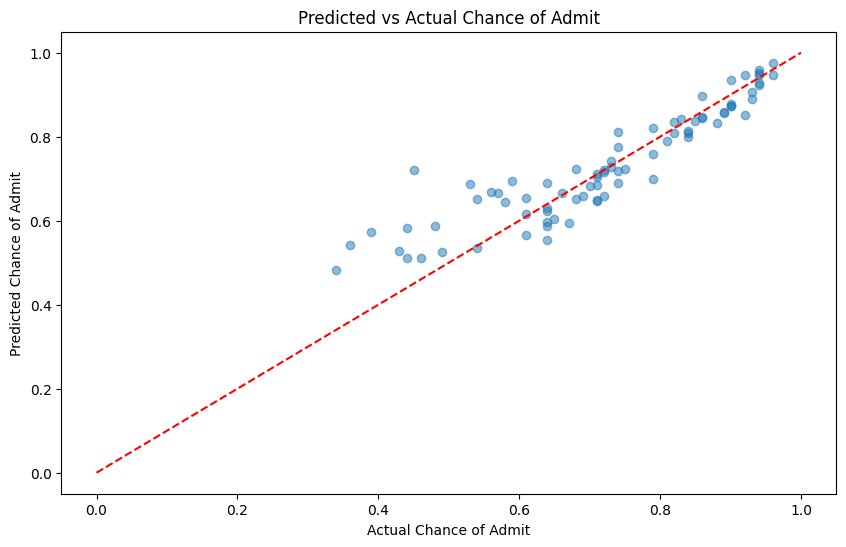

Actual: 0.68, Predicted: 0.6511744621562403
Actual: 0.68, Predicted: 0.7236874052880304
Actual: 0.9, Predicted: 0.9353680948898282
Actual: 0.79, Predicted: 0.8216431599284457
Actual: 0.44, Predicted: 0.5815867330167592
Actual: 0.94, Predicted: 0.9286301577067626
Actual: 0.43, Predicted: 0.5268236567111317
Actual: 0.36, Predicted: 0.5430899321465712
Actual: 0.72, Predicted: 0.659405829089416
Actual: 0.85, Predicted: 0.8383492373472488


In [ ]:
# Visualizing Model Performance: Predicted vs. Actual Values
import matplotlib.pyplot as plt
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit')
plt.show()
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

In [ ]:
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}')

Actual: 0.6800, Predicted: 0.6512
Actual: 0.6800, Predicted: 0.7237
Actual: 0.9000, Predicted: 0.9354
Actual: 0.7900, Predicted: 0.8216
Actual: 0.4400, Predicted: 0.5816
Actual: 0.9400, Predicted: 0.9286
Actual: 0.4300, Predicted: 0.5268
Actual: 0.3600, Predicted: 0.5431
Actual: 0.7200, Predicted: 0.6594
Actual: 0.8500, Predicted: 0.8383


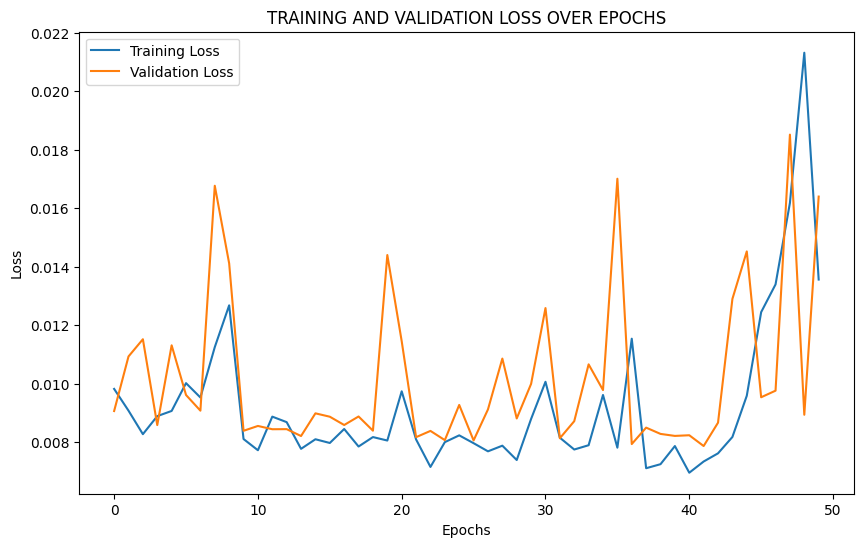

In [ ]:
# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('TRAINING AND VALIDATION LOSS OVER EPOCHS')
plt.legend()
plt.show()